#Obesity Level Prediction Using Lifestyle and Behavioral Data

### Problem Statement
Obesity is a major public health challenge influenced by demographic, behavioral, and lifestyle factors. Early identification of obesity risk levels can support preventive healthcare interventions and policy planning.

This project aims to develop a machine learning model that predicts an individual’s obesity category (NObeyesdad) based on demographic attributes, dietary habits, physical activity, and lifestyle behaviors. The model will help identify high-risk individuals and demonstrate how data-driven approaches can support healthcare decision-making.

### Project scope will include:  
Data clean up - check for any missingness  
EDA analysis  
Feature engeneering
Modeling  
Evaluation  
Hyperparameter tuning  


In [43]:
# General Libraries

import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

# Data Explotation libraries
import matplotlib.pyplot as plt #Visualization
import seaborn as sns #Advanced Visualization
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
# Data modelling libraries
from sklearn.impute import SimpleImputer
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report, confusion_matrix
import itertools
from sklearn.metrics import f1_score

In [44]:
df1= pd.read_csv("/content/ObesityDataSet_raw_and_data_sinthetic.csv")

In [45]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [46]:
df1.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [47]:
df1.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [48]:
df1['NObeyesdad'].unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

Underweight = less than 18.5  
Normal weight = 18.5-24.9  
Overweight = 25.9 - 29.9  
Obesity I = 30.0- 34.9  
Obesity II = 35.0- 39.9



In [49]:
df1['CALC'].unique()

array(['no', 'Sometimes', 'Frequently', 'Always'], dtype=object)

In [50]:
df1['CAEC'].unique()

array(['Sometimes', 'Frequently', 'Always', 'no'], dtype=object)

In [51]:
df1['MTRANS'].unique()

array(['Public_Transportation', 'Walking', 'Automobile', 'Motorbike',
       'Bike'], dtype=object)

## Pre-processing

### Check for Missingness

In [52]:
df1.columns[df1.isna().any()]

Index([], dtype='object')

- Dataset has no missingness

In [53]:
df1.duplicated().sum()

np.int64(24)

In [54]:
le = LabelEncoder()

### EDA

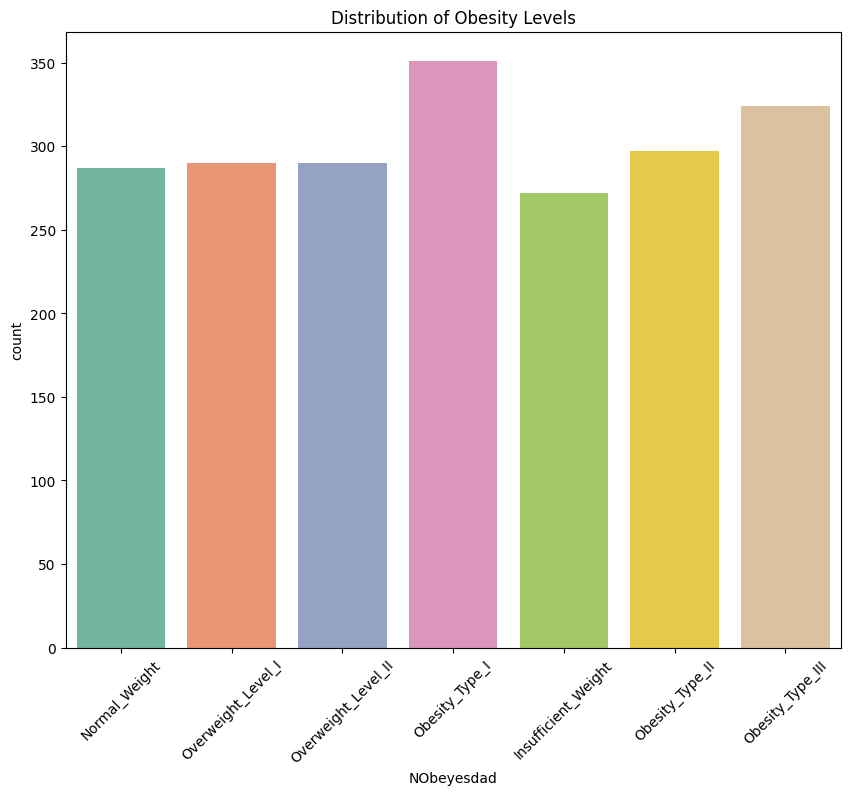

In [55]:
plt.figure(figsize=(10, 8))
sns.countplot(data=df1, x="NObeyesdad", palette="Set2")
plt.xticks(rotation=45)
plt.title("Distribution of Obesity Levels")
plt.show()

- The distribution above shows varrying class frequencies therefore a mild class imbalance

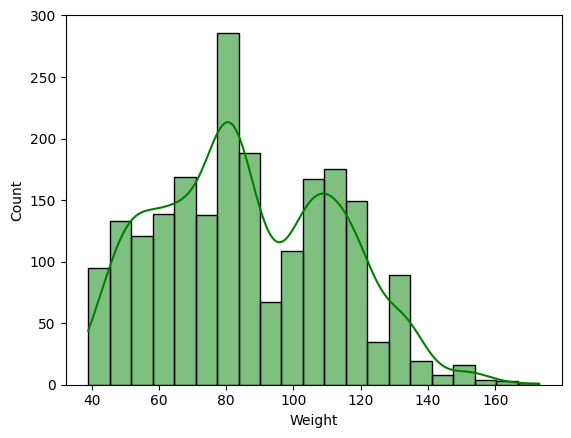

In [56]:
sns.histplot(df1, x="Weight", kde= True, color="green")
plt.xlabel('Weight')
plt.show()

- The weight variable shows a right-skewed distribution, indicating that while most individuals have moderate body weights, a smaller proportion falls into higher weight ranges associated with overweight and obesity.  
- The weight values have outlier influence

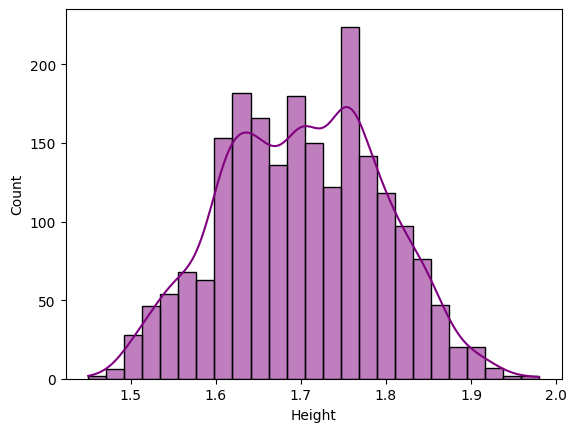

In [57]:
sns.histplot(df1, x="Height", kde= True, color="purple")
plt.xlabel('Height')
plt.show()

- The height distribution is approximately normal, with most individuals clustered around the mean and few extreme values. This suggests limited variability in stature across the dataset

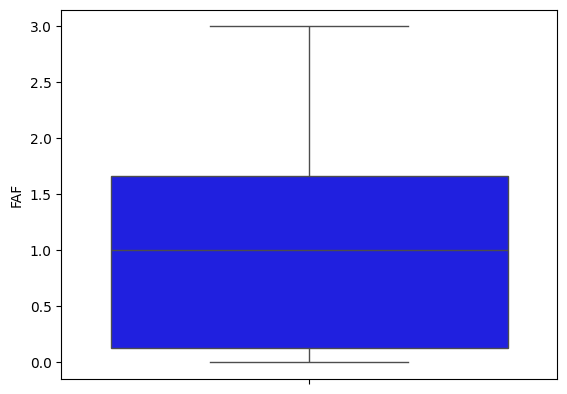

In [58]:
sns.boxplot(df1['FAF'], color='blue')
plt.show()

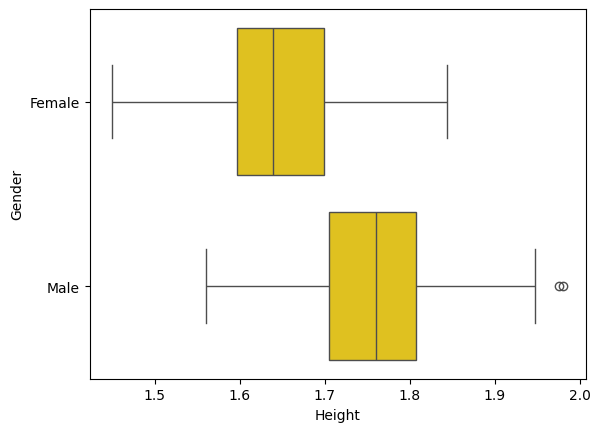

In [59]:
sns.boxplot(df1, x='Height',y='Gender',color='gold')
plt.show()

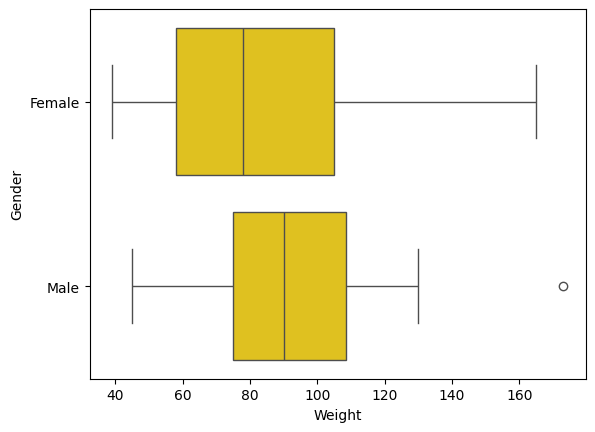

In [60]:
sns.boxplot(df1, x='Weight',y='Gender',color='gold')
plt.show()

<Axes: xlabel='NObeyesdad', ylabel='Weight'>

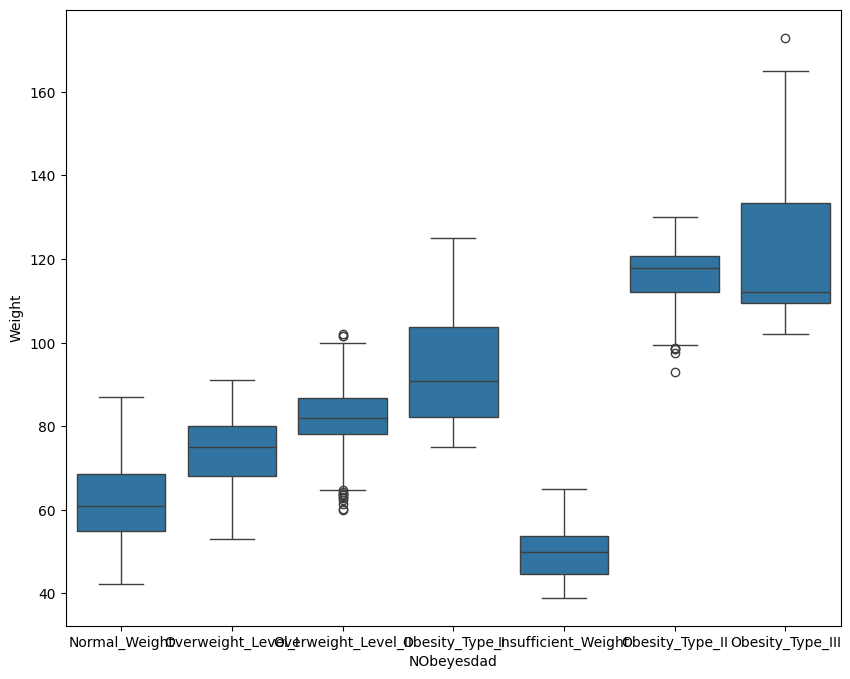

In [61]:
plt.figure(figsize=(10,8))
sns.boxplot(x="NObeyesdad", y="Weight", data=df1)

- Weight increases consistently accross obesity levels  
- Type_ii obesity has averagely higher weight compared to type_iii and the rest

#### Correlation Analysis

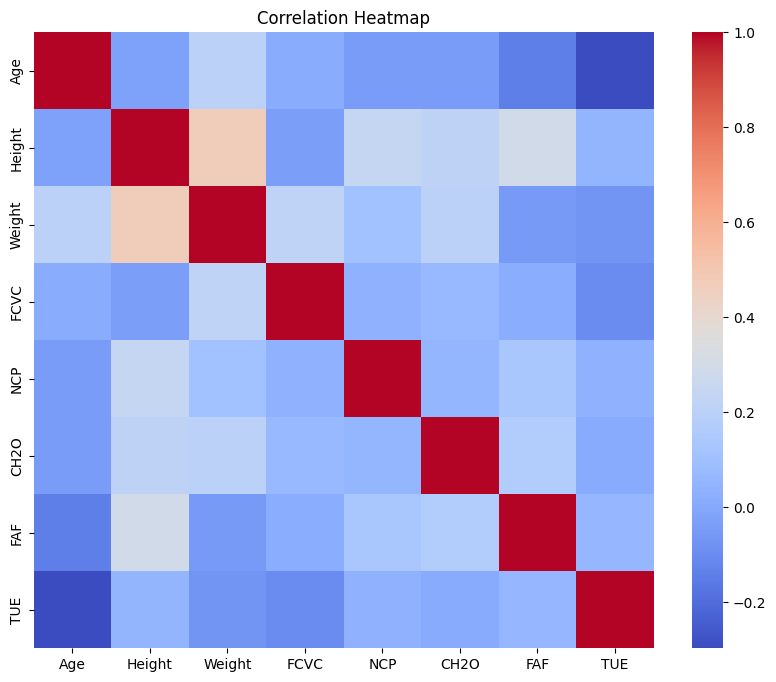

In [62]:
num_df = df1.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(10, 8))
sns.heatmap(num_df.corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap")
plt.show()

In [63]:
# drop prediction column
y = df1.NObeyesdad

X = df1.drop(columns=['NObeyesdad'])

In [64]:
features_names= X.columns
target_names = df1['NObeyesdad'].unique()

### Encoding

In [65]:
X.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation


In [66]:
Label_Encoders = {}
for column in X.columns:
  if X[column].dtype == 'object':
    Label_Encoders[column]= LabelEncoder()
    X[column]= Label_Encoders[column].fit_transform(X[column])

In [67]:
from  sklearn.model_selection import train_test_split

In [68]:
#split data into training and testing set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [69]:
X_train.shape

(1688, 16)

In [70]:
X_train.dtypes

,0
Gender,int64
Age,float64
Height,float64
Weight,float64
family_history_with_overweight,int64
FAVC,int64
FCVC,float64
NCP,float64
CAEC,int64
SMOKE,int64


### Classification Methods

1. Bernoulli Naive Bayes

In [71]:
from sklearn.metrics import accuracy_score


In [72]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [73]:
model.fit(X_train,y_train)

GaussianNB()

In [74]:
model.score(X_train, y_train)

0.582345971563981

In [75]:
#train the model
pred_train= model.predict(X_train)

In [76]:
model_train_score = accuracy_score(pred_train,y_train)*100
model_train_score

58.2345971563981

In [77]:
#test model with test data
pred_test= model.predict(X_test)

In [78]:
#test accuracy of the predicted model
model_test_score= accuracy_score(pred_test,y_test)*100
model_test_score

60.047281323877066

- Hyperparameter tuning wasn't done on Naive Bayes due to its probabilistic nature

2. Decission Trees

In [79]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [80]:
#create the model
dt_clf = DecisionTreeClassifier(random_state=0)

In [81]:
dt_clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [82]:
#train the model
pred_train= dt_clf.predict(X_train)

In [83]:
#test accuracy of the model
dt_clf_train_score = accuracy_score(pred_train,y_train)*100
dt_clf_train_score

100.0

In [84]:
#test model with test data
pred_test= dt_clf.predict(X_test)

In [85]:
#test accuracy of the predicted model
dt_clf_test_score= accuracy_score(pred_test,y_test)*100
dt_clf_test_score

92.67139479905437

#### Hyperparameter tuning of decision tree model

In [86]:
from sklearn.model_selection import GridSearchCV

In [87]:
param_grid = {
    'criterion' : ['gini','entropy'],
    'max_depth' : [None,5,10,15,20],
    'min_samples_split': [2,5,10],
    'min_samples_leaf': [1,2,4],
    'max_features': ['auto', 'sqrt','log2'],
    'random_state': [42]
}



In [88]:
clf_dt = GridSearchCV(DecisionTreeClassifier(),param_grid,cv=5,scoring='accuracy')

In [89]:
#fit model to training data
clf_dt.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15, 20],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'random_state': [42]},
             scoring='accuracy')

In [90]:
#print best hyperparameters
print("Best hyperparameters:", clf_dt.best_params_)

Best hyperparameters: {'criterion': 'gini', 'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 42}


In [91]:
#evaluate model with best parameters on the test set
best_clf= clf_dt.best_estimator_
dt_train_accuracy= best_clf.score(X_train,y_train)
dt_test_accuracy= best_clf.score(X_test,y_test)

print(f"Train accuraccy with best hyperparameters: {dt_train_accuracy}")
print(f"Test accuraccy with best hyperparameters: {dt_test_accuracy}")

Train accuraccy with best hyperparameters: 0.9982227488151659
Test accuraccy with best hyperparameters: 0.8085106382978723


In [92]:
clf_dt = DecisionTreeClassifier(
    criterion='gini',
    max_depth=15,
    max_features='sqrt',
    min_samples_leaf=1,
    min_samples_split=2,
    random_state=42
)

clf_dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=15, max_features='sqrt', random_state=42)

In [93]:
#train model
pred_train=clf_dt.predict(X_train)

In [94]:
#check for accuracy
dt_train_accurary2=accuracy_score(pred_train,y_train)*100
dt_train_accurary2

99.82227488151659

In [95]:
#test model with test data
pred_test2 =clf_dt.predict(X_test)

In [96]:
dt_test_accurary2=accuracy_score(pred_test2,y_test)*100
dt_test_accurary2

80.85106382978722

### Plot the decision tree

In [97]:
from sklearn.tree import plot_tree

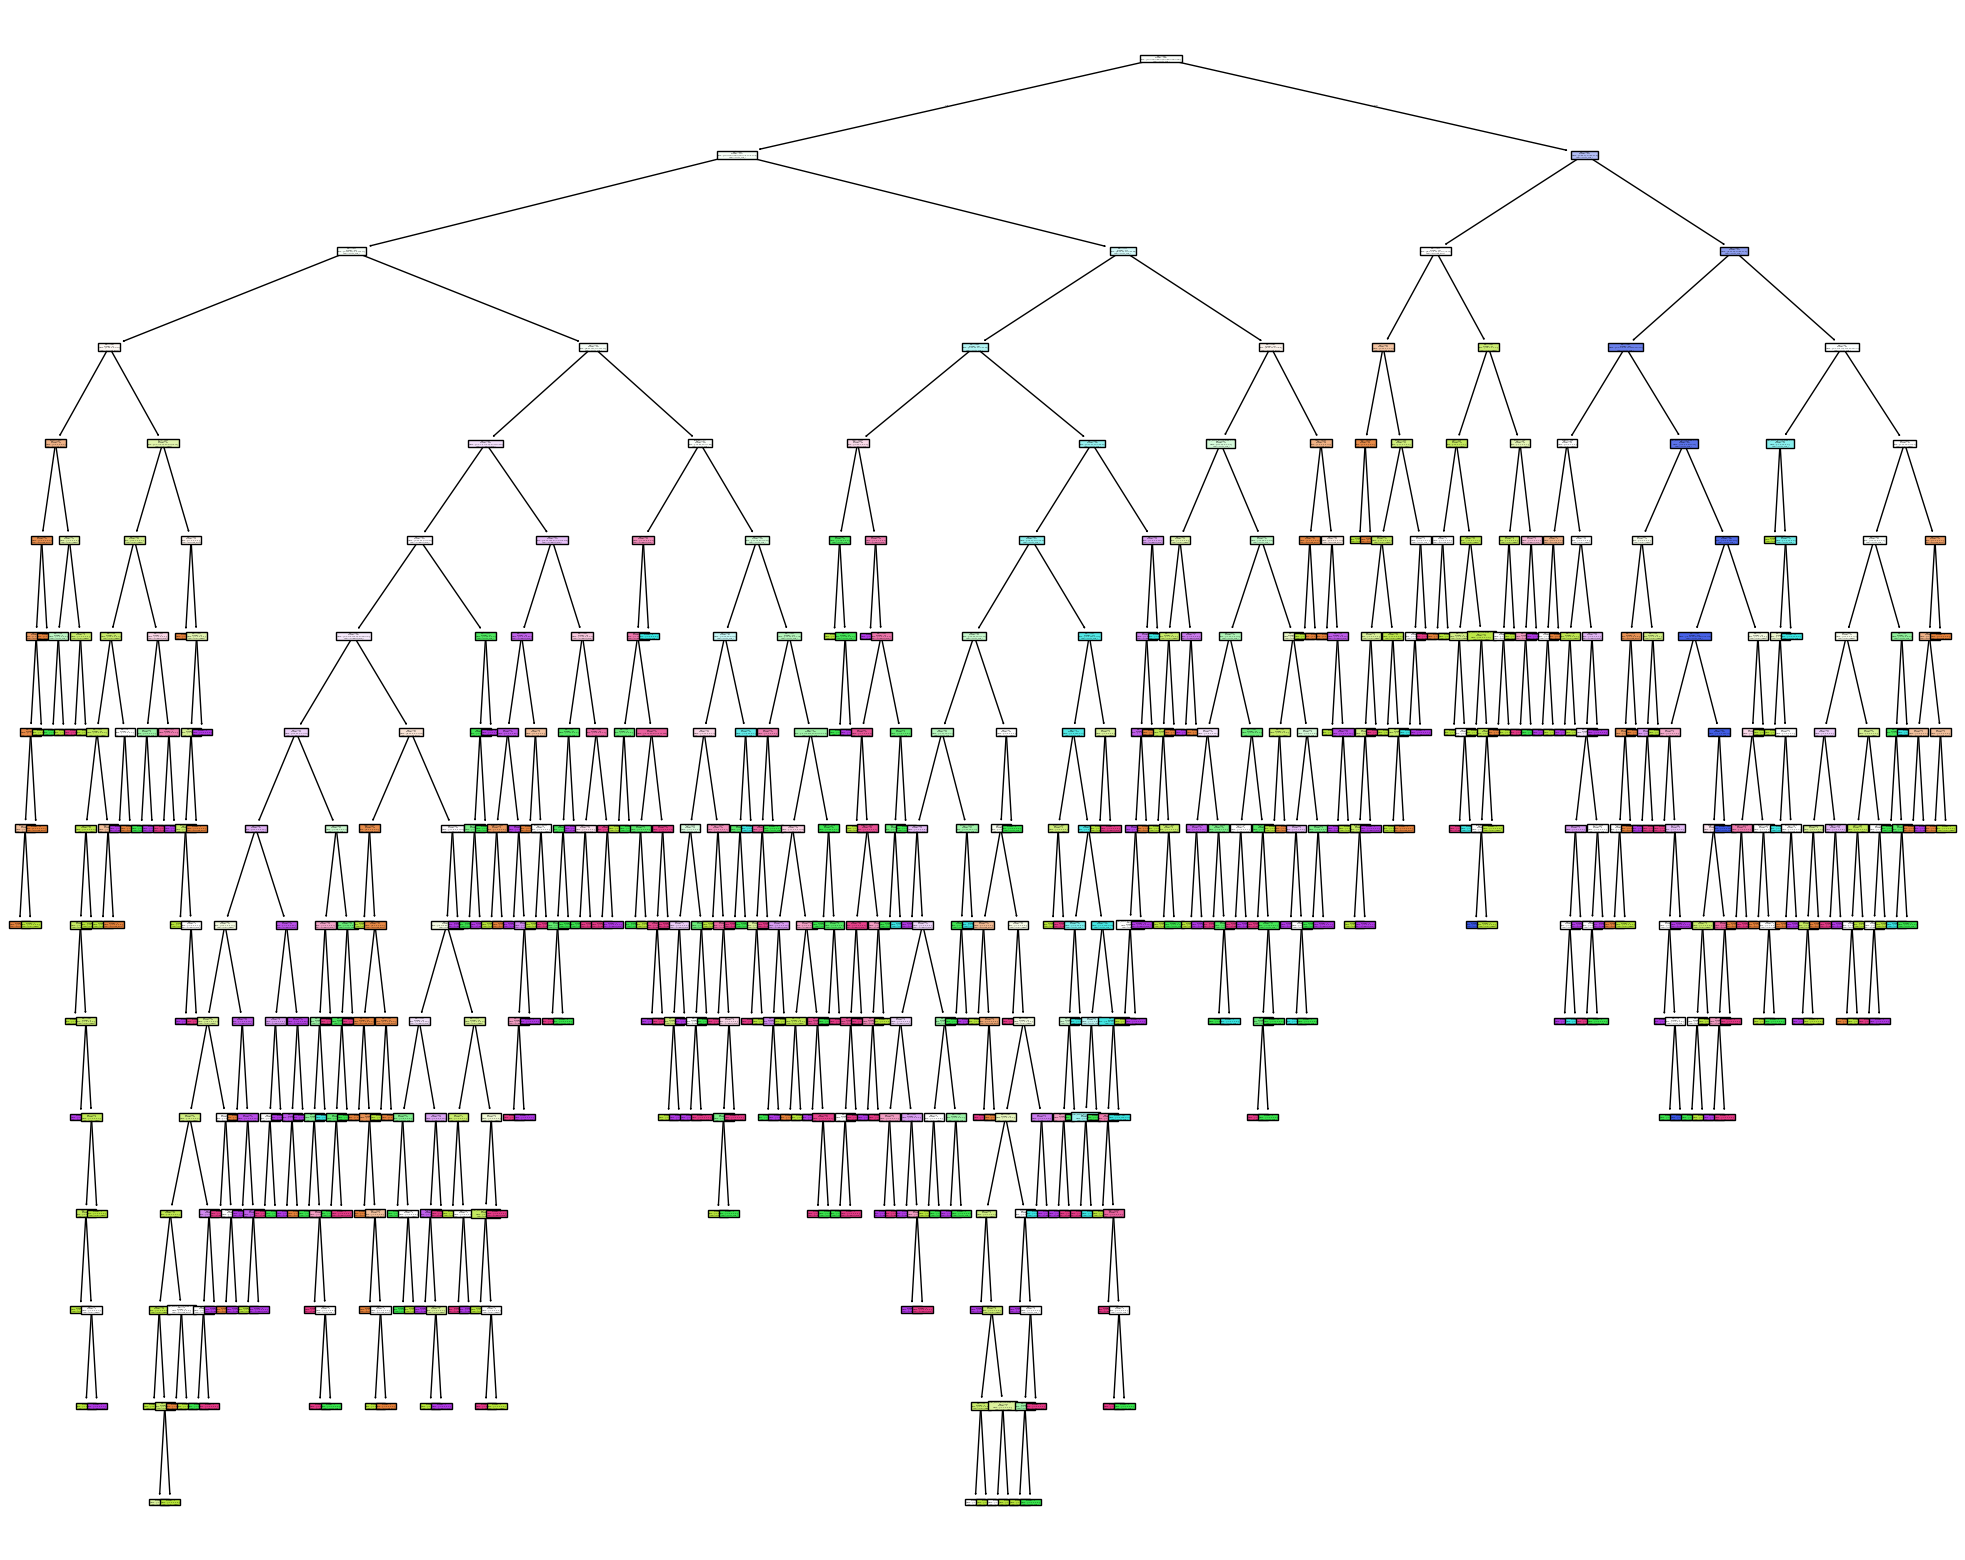

In [98]:

plt.figure(figsize=(25, 20))
plot_tree(
    clf_dt,
    feature_names=X_train.columns,
    class_names=clf_dt.classes_,
    filled=True
)
plt.show()

- The decision tree indicates a fit of obestit data very well, though has a challange of reduced interpretability since it is wide and quite detailed

### Classification Report

In [99]:
y_pred=clf_dt.predict(X_test)
print(classification_report(y_test,y_pred))

                     precision    recall  f1-score   support

Insufficient_Weight       0.81      0.86      0.84        65
      Normal_Weight       0.65      0.58      0.61        57
     Obesity_Type_I       0.75      0.87      0.81        67
    Obesity_Type_II       0.94      0.91      0.92        53
   Obesity_Type_III       0.99      1.00      0.99        69
 Overweight_Level_I       0.74      0.65      0.69        57
Overweight_Level_II       0.75      0.75      0.75        55

           accuracy                           0.81       423
          macro avg       0.80      0.80      0.80       423
       weighted avg       0.81      0.81      0.81       423



- Above report indicates balanced performance accross classes. accuracy is at 81%, macro F1 at around 0.80  
- Obesity type ii and iii are best perfoming classes while normal weight class is poor this may arise due to conffusion errors.


### Apply a confussion matrix to asses where confussion might be occuring within the classes

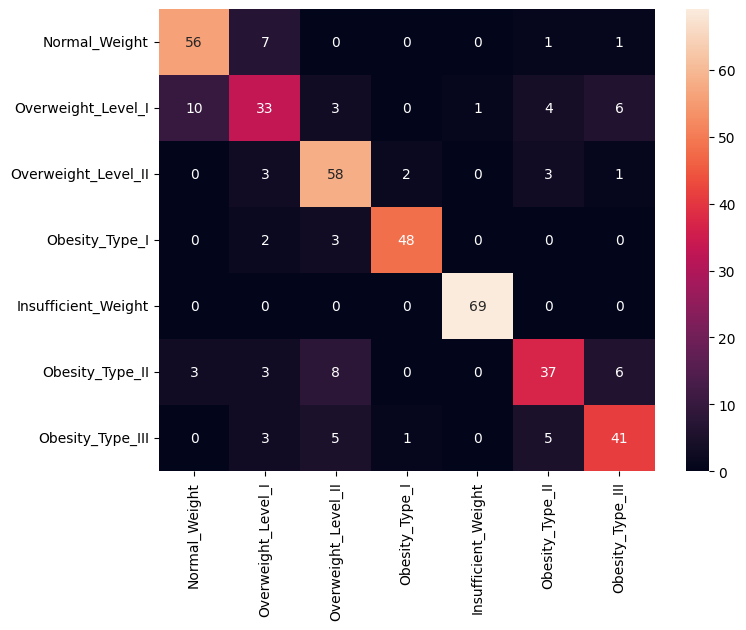

In [100]:
#confusion matrix
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(8,6))
ax=sns.heatmap(cm,annot=True,fmt='d',xticklabels=target_names, yticklabels=target_names)
plt.show()

- 7 normal weight individuals were predicted as overweight  and obese
- overweight level 1 shows most confussion this can be because it lies between obesity and normal weight.  
- Severe obesity and underweight categories are classified with high accuracy, demonstrating the model’s ability to capture distinct physiological patterns.  
- No major misclassifications identified

- Model shows high variance with sharp decision boundaries

### Random Forest

- While the decision tree achieved high accuracy, it exhibited sensitivity to class boundaries, particularly between normal and overweight categories. To address variance and improve generalization, a Random Forest classifier was employed. By aggregating multiple decision trees, the model reduced overfitting and improved robustness, especially for borderline obesity classes.

In [101]:
#initialize the randomForest classifier
rfc= RandomForestClassifier(n_estimators=100,random_state=42)

In [102]:
#fit classifier with training set
rfc.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [103]:
#train model
pred_train=rfc.predict(X_train)

In [104]:
rfc_train_score=accuracy_score(pred_train, y_train)*100
rfc_train_score

100.0

In [105]:
pred_test= rfc.predict(X_test)

In [106]:
rfc_test_score=accuracy_score(pred_test, y_test)*100
rfc_test_score

95.27186761229315

In [107]:
from sklearn.model_selection import GridSearchCV

In [108]:
rfc_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['log2'],
    'random_state': [42],
    'criterion': ['gini', 'entropy', 'log_loss']
}

In [109]:
#increse parameter performance
rfc_grid = GridSearchCV(RandomForestClassifier(),rfc_param_grid,cv=5)
rfc_grid.fit(X_train,y_train)
rfc_best_params=rfc_grid.best_params_
rfc_best_score=rfc_grid.best_score_

print("RandomForestClassifier best parameter: ", rfc_best_params)
print("RandomForestClassifier best score: ", rfc_best_score)


RandomForestClassifier best parameter:  {'criterion': 'entropy', 'max_features': 'log2', 'n_estimators': 300, 'random_state': 42}
RandomForestClassifier best score:  0.952028865906976


In [110]:
rfc= RandomForestClassifier(n_estimators=200,criterion = 'entropy',max_features= 'log2',random_state=42)

In [111]:
rfc.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_features='log2',
                       n_estimators=200, random_state=42)

In [112]:
pred_train=rfc_grid.predict(X_train)

In [113]:
rfc_train_accuracy= accuracy_score(pred_train,y_train)*100
rfc_train_accuracy

100.0

In [114]:
pred_test=rfc_grid.predict(X_test)

In [115]:
rfc_test_accuracy= accuracy_score(pred_test,y_test)*100
rfc_test_accuracy

96.6903073286052

### RandomForest Classification Report

In [116]:
y_pred= rfc.predict(X_test)
print(classification_report(y_test,y_pred))

                     precision    recall  f1-score   support

Insufficient_Weight       1.00      0.94      0.97        65
      Normal_Weight       0.84      0.98      0.90        57
     Obesity_Type_I       0.97      0.99      0.98        67
    Obesity_Type_II       1.00      1.00      1.00        53
   Obesity_Type_III       1.00      1.00      1.00        69
 Overweight_Level_I       0.96      0.88      0.92        57
Overweight_Level_II       0.96      0.93      0.94        55

           accuracy                           0.96       423
          macro avg       0.96      0.96      0.96       423
       weighted avg       0.96      0.96      0.96       423



#### Draw a confusion matrix to display any misclassifications

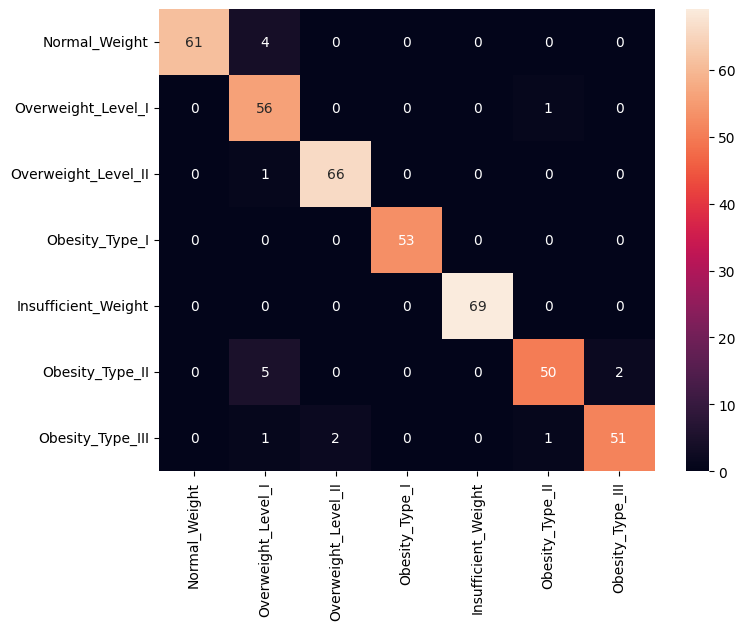

In [117]:
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(8,6))
ax=sns.heatmap(cm,annot=True,fmt='d',xticklabels=target_names, yticklabels=target_names)
plt.show()

- The model is strong and well generalized but still has few misclassifications  


### Gradient Boosting

In [118]:
from sklearn.ensemble import GradientBoostingClassifier

In [119]:
gb_clf= GradientBoostingClassifier(n_estimators=100)

In [120]:
gb_clf.fit(X_train,y_train)

GradientBoostingClassifier()

In [121]:
pred_train=gb_clf.predict(X_train)

In [122]:
gb_clf_train_score= accuracy_score(pred_train,y_train)*100
gb_clf_train_score

99.94075829383885

In [123]:
pred_test=gb_clf.predict(X_test)

In [124]:
gb_clf_test_score= accuracy_score(pred_test,y_test)*100
gb_clf_test_score

96.92671394799054

In [125]:
param_grid = {
    'n_estimators' : [50,100,200],
    'learning_rate': [0.01,0.1,0.5],
    'max_depth' : [3,5,7],
    'min_samples_split': [2,5,10],
    'min_samples_leaf': [1,2,4]
}

In [126]:
from sklearn.model_selection import RandomizedSearchCV

In [129]:
gb_random = RandomizedSearchCV(
    GradientBoostingClassifier(),
    param_distributions=param_grid,
    n_iter=30,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42,
    verbose=2
)

In [130]:
gb_random.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_iter=30,
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.1, 0.5],
                                        'max_depth': [3, 5, 7],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200]},
                   random_state=42, scoring='accuracy', verbose=2)

In [131]:
gb_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_depth': 7,
 'learning_rate': 0.5}

In [132]:

gb_random.best_score_

np.float64(0.9697979035344932)

In [133]:
#evaluate model
train_accuracy = gb_random.score(X_train,y_train)
test_accuracy = gb_random.score(X_test,y_test)
print(f"train accuracy with best hyperparameters: {train_accuracy}")
print(f"test accuracy with best hyperparameters: {test_accuracy}")

train accuracy with best hyperparameters: 1.0
test accuracy with best hyperparameters: 0.9858156028368794


- GridSearchCV took longer due to the large hyperparameter space and the sequential nature of Gradient Boosting. To improve computational efficiency,RandomizedSearchCV was used.

In [134]:
clf_gb=GradientBoostingClassifier(learning_rate=0.5,max_depth=7,min_samples_leaf=4,min_samples_split=2,n_estimators=200)

In [135]:
clf_gb.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.5, max_depth=7, min_samples_leaf=4,
                           n_estimators=200)

In [136]:
pred_train=clf_gb.predict(X_train)

In [137]:
gb_train_accuracy=accuracy_score(pred_train,y_train)
gb_train_accuracy

1.0

In [138]:
pred_test= clf_gb.predict(X_test)

In [139]:
gb_test_accuracy=accuracy_score(pred_test,y_test)
gb_test_accuracy

0.9763593380614657

#### Gradient boosting classification report

In [140]:
y_pred=clf_gb.predict(X_test)
print(classification_report(y_test,y_pred))

                     precision    recall  f1-score   support

Insufficient_Weight       0.98      0.95      0.97        65
      Normal_Weight       0.89      0.98      0.93        57
     Obesity_Type_I       0.99      1.00      0.99        67
    Obesity_Type_II       1.00      1.00      1.00        53
   Obesity_Type_III       1.00      1.00      1.00        69
 Overweight_Level_I       0.98      0.93      0.95        57
Overweight_Level_II       1.00      0.96      0.98        55

           accuracy                           0.98       423
          macro avg       0.98      0.98      0.98       423
       weighted avg       0.98      0.98      0.98       423



#### Confusion matrix for Gradient boosting model

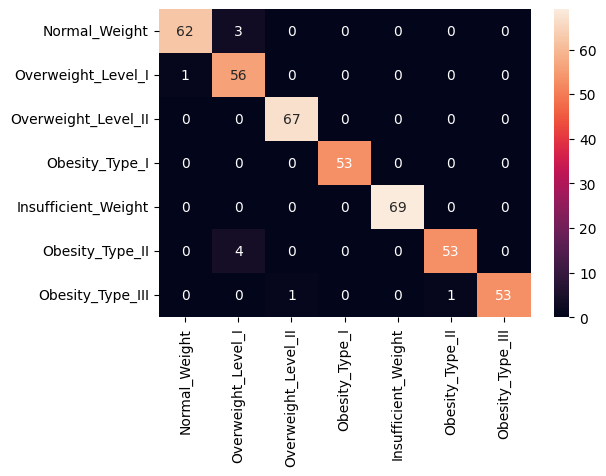

In [141]:
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(6,4))
ax=sns.heatmap(cm,annot=True,fmt='d',xticklabels=target_names, yticklabels=target_names)
plt.show()

- Compared to random forest and other classification models used , gradient boosting is performing better with very few  misclassifications.

### ROC Curve for Gradient Boosting

In [148]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

In [149]:
#Binarize test class labels
classes = y_test.unique()
y_test_bin = label_binarize(y_test, classes=classes)

In [162]:
classes = gb_random.best_estimator_.classes_

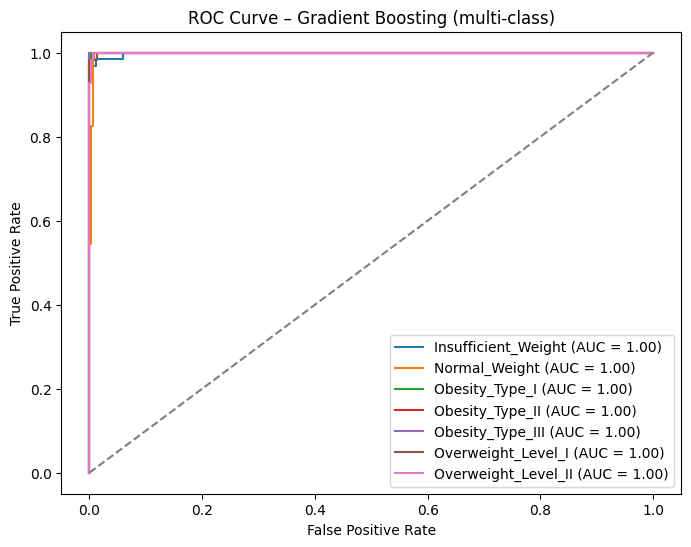

In [173]:
y_test_bin = label_binarize(y_test, classes=classes)
y_prob = gb_random.best_estimator_.predict_proba(X_test)

plt.figure(figsize=(8,6))

for i, class_name in enumerate(classes):
    fpr, tpr, thresholds = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{class_name} (AUC = {roc_auc:.2f})')

plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve – Gradient Boosting (multi-class)')
plt.legend(loc='lower right')
plt.show()

### Feature importance selection

<Axes: >

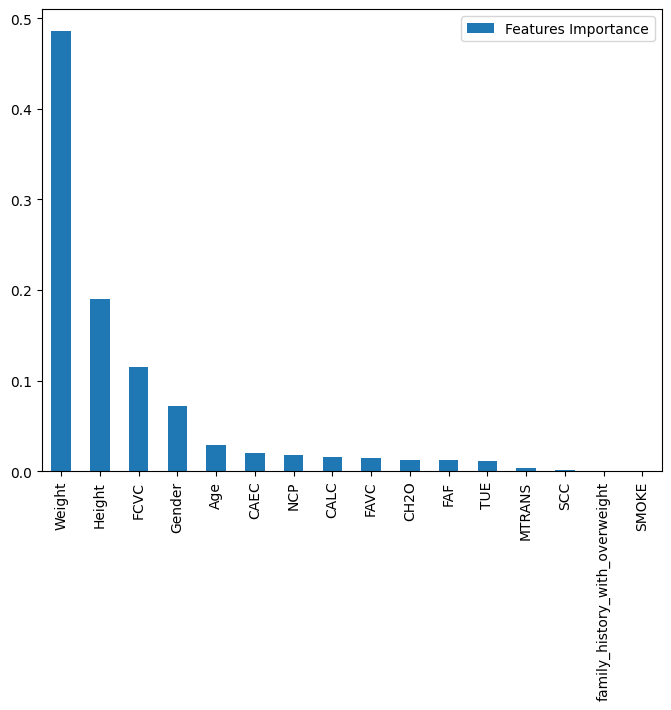

In [ ]:
feat_importance=pd.DataFrame(clf_gb.feature_importances_,index=features_names,columns=["Features Importance"])
feat_importance.sort_values(by='Features Importance', ascending=False,inplace=True)
feat_importance.plot(kind='bar',figsize=(8,6))

#### Threshold corresponding to the maximum difference between tpr and fpr

In [171]:
optimal_index= np.argmax(tpr-fpr)

In [175]:
optimal_threshold= thresholds[optimal_index]
optimal_threshold

np.float64(0.010389842927468163)

In [176]:
y_pred_new_threshold= (y_prob >=optimal_threshold).astype(int)

### Model Selection

#### Display of general model scores

In [178]:
score_data={
    'Model':['Naive Bayes','Decision Tree', 'Random Forest','Gradient Boosting'],
    'Train Score': [model_train_score,dt_clf_train_score,rfc_train_score,gb_clf_train_score],
    'Test Score': [model_test_score,dt_clf_test_score,rfc_test_score,gb_clf_test_score],
    'Tuned Train Score': [model_train_score,dt_train_accurary2,rfc_train_accuracy,gb_train_accuracy],
    'Tuned Test Score': [model_test_score, dt_test_accurary2,rfc_test_accuracy,gb_test_accuracy]

}

#scores dataframe
scores_df= pd.DataFrame(score_data)

#sort by scores
sorted_scores_df=scores_df.sort_values(by='Tuned Test Score',ascending=False)

sorted_scores_df

,Model,Train Score,Test Score,Tuned Train Score,Tuned Test Score
2,Random Forest,100.000000,95.271868,100.000000,96.690307
1,Decision Tree,100.000000,92.671395,99.822275,80.851064
0,Naive Bayes,58.234597,60.047281,58.234597,60.047281
3,Gradient Boosting,99.940758,96.926714,1.000000,0.976359


### Save the best model to a file

In [ ]:
import joblib

joblib.dump(clf_gb, 'gradient_boosting_model.pkl')


['gradient_boosting_model.pkl']

### Scores interpretation  
- Decision tree- has overfitting and showed sensitivity to hyperparameters  
- Naive Bayes- has low accuracy, underfitted  
- Random Forest- displayed high accuracy , robust to noise and stable  
- Gradient Boosting- Highest accuracy level, best generalization with excellent biase variance trade-off

###Conclusion

- Among all evaluated models, Gradient Boosting achieved the highest tuned test accuracy (98.6%), indicating superior generalization performance. Although Random Forest also performed strongly, Gradient Boosting was selected as the final model due to its ability to capture complex nonlinear relationships in the data.